In [44]:
import hdbscan
import pandas as pd
import matplotlib.pyplot as plt
import auto_glosh
import numpy as np

In [45]:
bana_datasets_paths = [
    "datasets/synthetic/global/banana_1.csv",
    "datasets/synthetic/clumps/banana_1.csv",
    "datasets/synthetic/local/banana_4.csv",
    "datasets/synthetic/clumps/circular_1.csv",
    "datasets/synthetic/global/anisotropic_1.csv",
    "datasets/synthetic/global/circular_1.csv",
    "datasets/synthetic/local/circular_7.csv",
    "datasets/synthetic/local/anisotropic_8.csv",
    "datasets/synthetic/clumps/anisotropic_1.csv"
    ]
glosh_sorted_profiles_paths = [path.replace(".csv", "_outliers.csv") for path in bana_datasets_paths]
glosh_unsorted_profiles_paths = [path.replace(".csv", "not_sorted_outliers.csv") for path in bana_datasets_paths]
glosh_sorted_profiles_paths_python = [path.replace(".csv", "_outliers_python.csv") for path in bana_datasets_paths]
glosh_unsorted_profiles_paths_python = [path.replace(".csv", "_not_sorted_outliers_python.csv") for path in bana_datasets_paths]

best_mpts = []
best_mpts_rust = []

In [46]:
for path in glosh_sorted_profiles_paths_python:
    glosh_profiles = pd.read_csv(path, header=None)
    best_mpt = auto_glosh.find_best_min_pts(glosh_profiles)
    best_mpts.append(best_mpt)

In [47]:
for path in glosh_unsorted_profiles_paths:
    glosh_profiles = pd.read_csv(path, header=None)
    best_mpt = auto_glosh.find_best_min_pts(glosh_profiles)
    best_mpts_rust.append(best_mpt)

In [48]:
def print_data(data, k, name, match_ref=False):
    clusterer = hdbscan.HDBSCAN(
        alpha=1.0, 
        approx_min_span_tree=False,
        gen_min_span_tree=True,
        metric='euclidean', 
        min_cluster_size=k, 
        min_samples=k,
        allow_single_cluster=False,
        match_reference_implementation=match_ref)
    clusterer.fit(data)
    mst = clusterer.single_linkage_tree_.to_numpy()
    mst_weight = sum([x[2] for x in mst])
    # print("MST weight: ", mst_weight) # Should be 30.83044942

    # Step 3. Plot the data and the outlier scores
    outlier_scores = clusterer.outlier_scores_
    plt.scatter([x[0] for x in data], [x[1] for x in data], s=25, c=outlier_scores, cmap='viridis')
    plt.colorbar()

    # Print outlier scores
    # for (i, score) in enumerate(outlier_scores):
    #     print(f"Outlier {i+1} score: {score}")

    # Step 4: Assign rankings and plot top outliers
    indices = [i for i in range(len(outlier_scores))]
    indices.sort(key=lambda x: outlier_scores[x])
    ranks = indices[-30:]
    ranks = reversed(ranks)
    for i, idx in enumerate(ranks):
        plt.text(data[idx][0], data[idx][1], str(i+1), fontsize=10, color='black')
    plt.title(name)

    plt.axis('equal')
    plt.show()

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


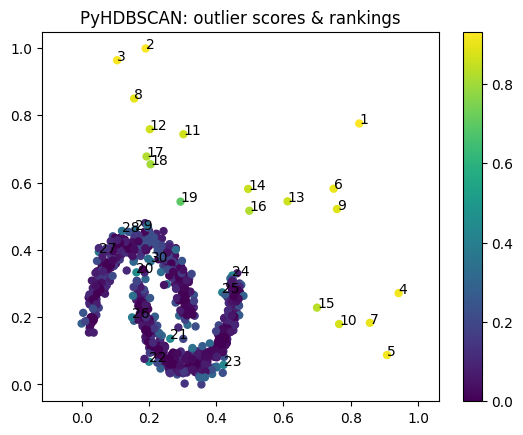

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


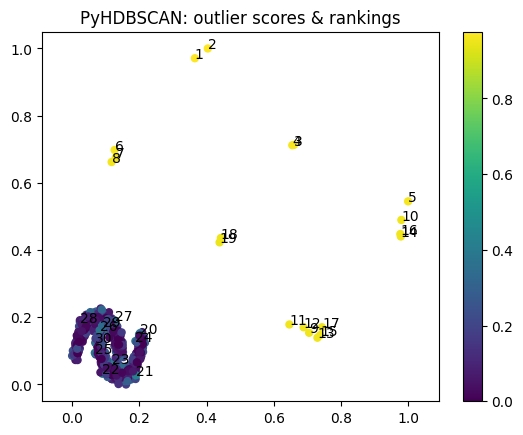

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


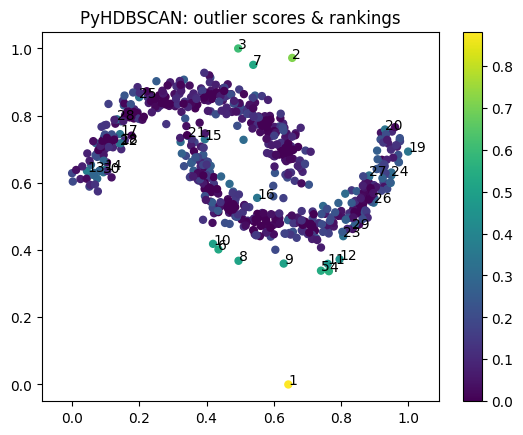

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


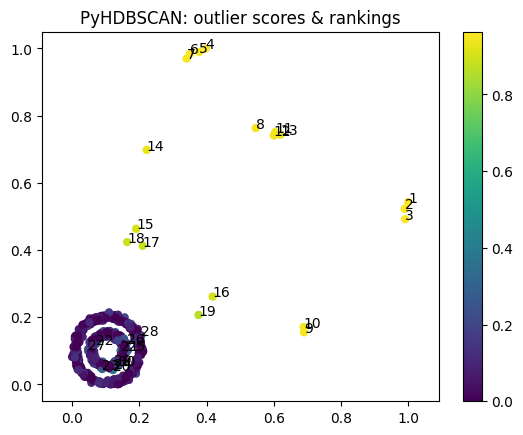

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


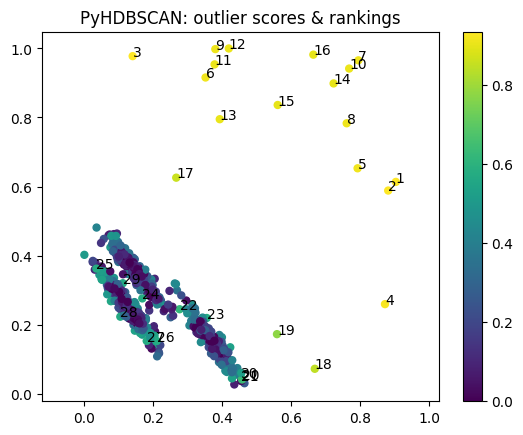

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


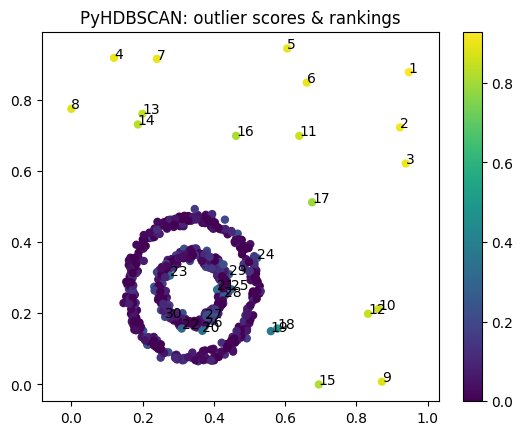

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


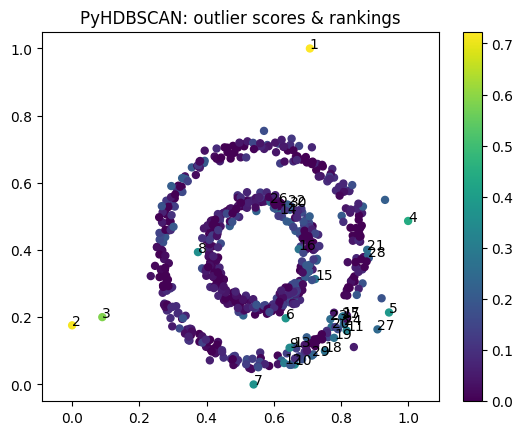

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


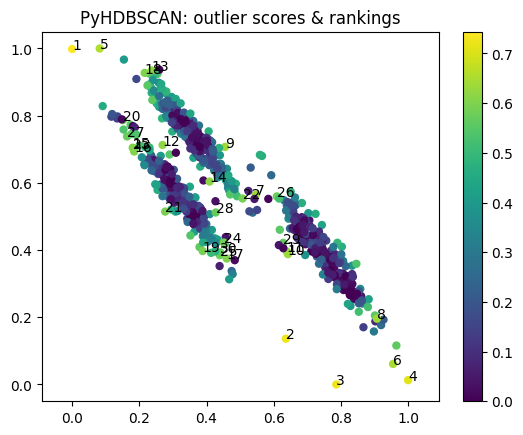

/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/shukurillo/lab/OD/ParameterFree-HDBSCAN-Outlier-Detection/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


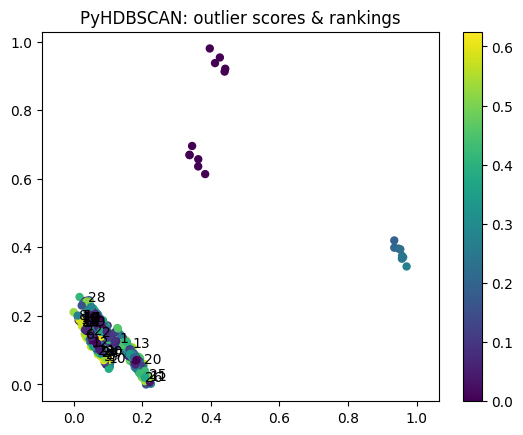

In [58]:
for i, path in enumerate(bana_datasets_paths):
    data = pd.read_csv(path).to_numpy()
    data = np.delete(data, 2, axis=1)
    best_mpt = 10 # best_mpts[i]
    print_data(data, best_mpt, name="PyHDBSCAN: outlier scores & rankings")

In [53]:
def print_data_rust(data, name, outlier_scores):
    plt.scatter([x[0] for x in data], [x[1] for x in data], s=25, c=outlier_scores, cmap='viridis')
    plt.colorbar()

    # Step 4: Assign rankings and plot top outliers
    indices = [i for i in range(len(outlier_scores))]
    indices.sort(key=lambda x: outlier_scores[x])
    ranks = indices[-30:]
    ranks = reversed(ranks)
    for i, idx in enumerate(ranks):
        plt.text(data[idx][0], data[idx][1], str(i+1), fontsize=10, color='black')
    plt.title(name)

    plt.axis('equal')
    plt.show()

Min pts  10


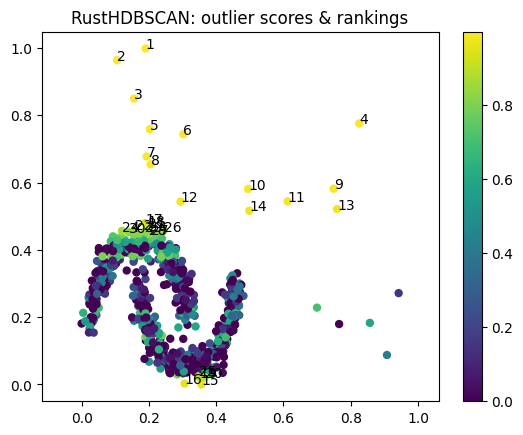

Min pts  10


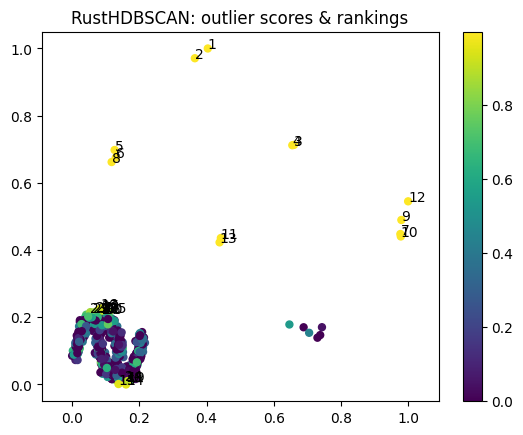

Min pts  10


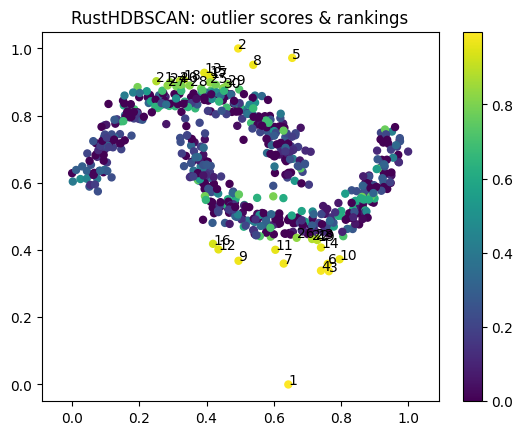

Min pts  10


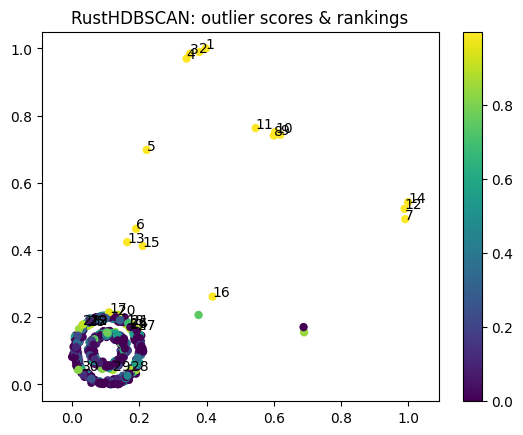

Min pts  10


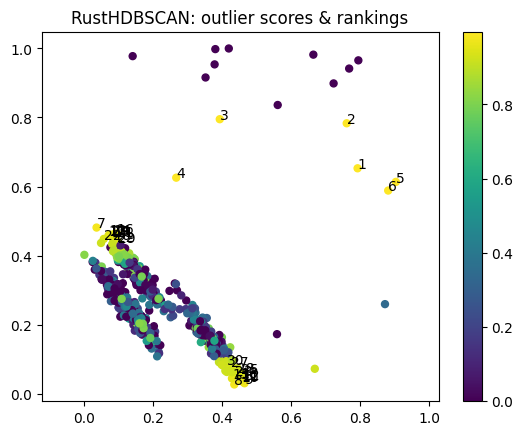

Min pts  10


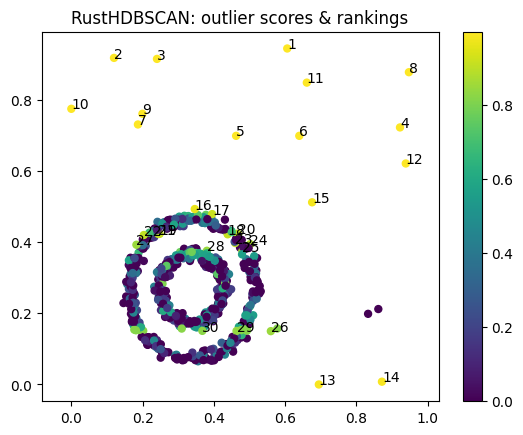

Min pts  10


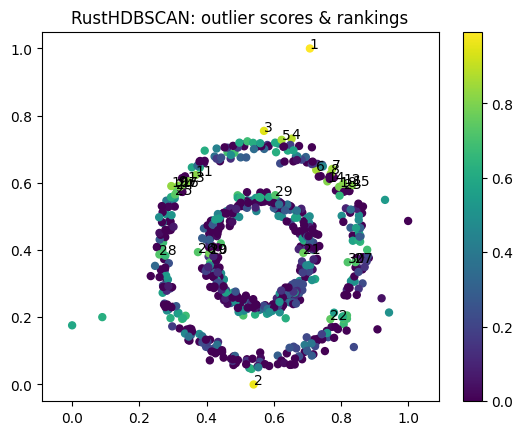

Min pts  10


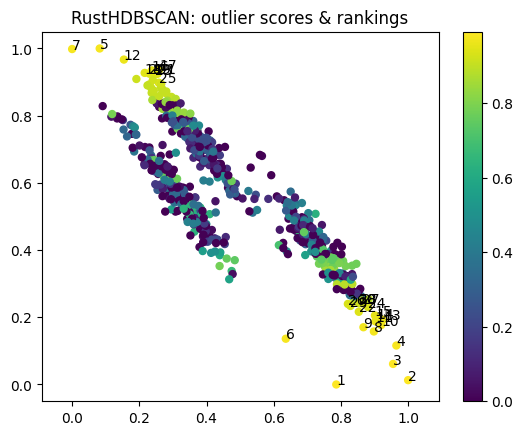

Min pts  10


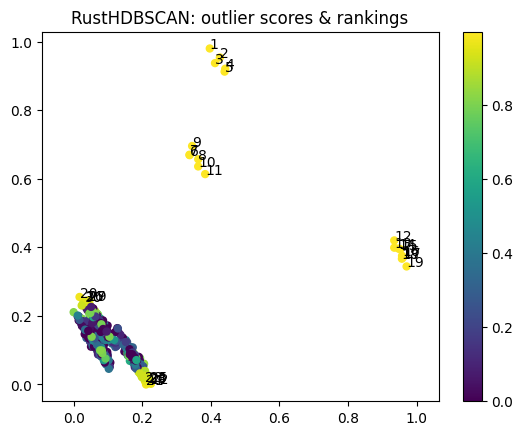

In [59]:
for i, path in enumerate(bana_datasets_paths):
    data = pd.read_csv(path).to_numpy()
    data = np.delete(data, 2, axis=1)
    best_mpt = 10 # best_mpts_rust[i]
    outliers = pd.read_csv(glosh_unsorted_profiles_paths[i], header=None).to_numpy()[:, best_mpt - 2]
    print("Min pts ", best_mpt)

    print_data_rust(data, "RustHDBSCAN: outlier scores & rankings", outliers)